<center><h1>Nabar_Deven_HW5</h1></center>
<br>
<br>

Name: Deven Nabar
<br>
Github Username: DevenNabar
<br>
USC ID: 7229446568

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
!pip3 install xgboost

In [2]:
!pip install graphviz

In [3]:
import pandas as pd
import codecs
import numpy as np
from sklearn import tree
from skmultilearn.problem_transform import LabelPowerset
from sklearn import preprocessing
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb

### (a) Obtain Data

Get the Accute Inamations Data Set

In [4]:
data=pd.read_csv("../data/diagnosis.data", encoding='utf-16', sep='\t', names=['Temperature of patient','Occurence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet','Inflammation of urinary bladder','Nephritis of renal pelvis origin'])
# data

### (b) Build a decision tree

In [5]:
label_encoder = preprocessing.LabelEncoder()
data['Occurence of nausea']= label_encoder.fit_transform(data['Occurence of nausea'])
data['Lumbar pain']= label_encoder.fit_transform(data['Lumbar pain'])
data['Urine pushing']= label_encoder.fit_transform(data['Urine pushing'])
data['Micturition pains']= label_encoder.fit_transform(data['Micturition pains'])
data['Burning of urethra, itch, swelling of urethra outlet']= label_encoder.fit_transform(data['Burning of urethra, itch, swelling of urethra outlet'])
data['Inflammation of urinary bladder']= label_encoder.fit_transform(data['Inflammation of urinary bladder'])
data['Nephritis of renal pelvis origin']= label_encoder.fit_transform(data['Nephritis of renal pelvis origin'])
for i in ['Occurence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet','Inflammation of urinary bladder','Nephritis of renal pelvis origin']:
    data[i]=data[i].astype(float)    

In [6]:
# data

In [7]:
data['Temperature of patient']=data['Temperature of patient'].astype('string')
data['Temperature of patient']= data['Temperature of patient'].str.replace(',','.')
data['Temperature of patient']=data['Temperature of patient'].astype('float')
# data

In [8]:
X_train=data.iloc[:,0:6].values
Y_train=data.iloc[:,6:].values

data['Temperature of patient']=data['Temperature of patient'].astype('category')

In [9]:
lb=LabelPowerset()
lbtr=lb.transform(np.array(data.iloc[:,6:]))
# print(lbtr)

In [10]:
classifier1=tree.DecisionTreeClassifier(random_state=0)
classifier1.fit(X_train,lbtr)

DecisionTreeClassifier(random_state=0)

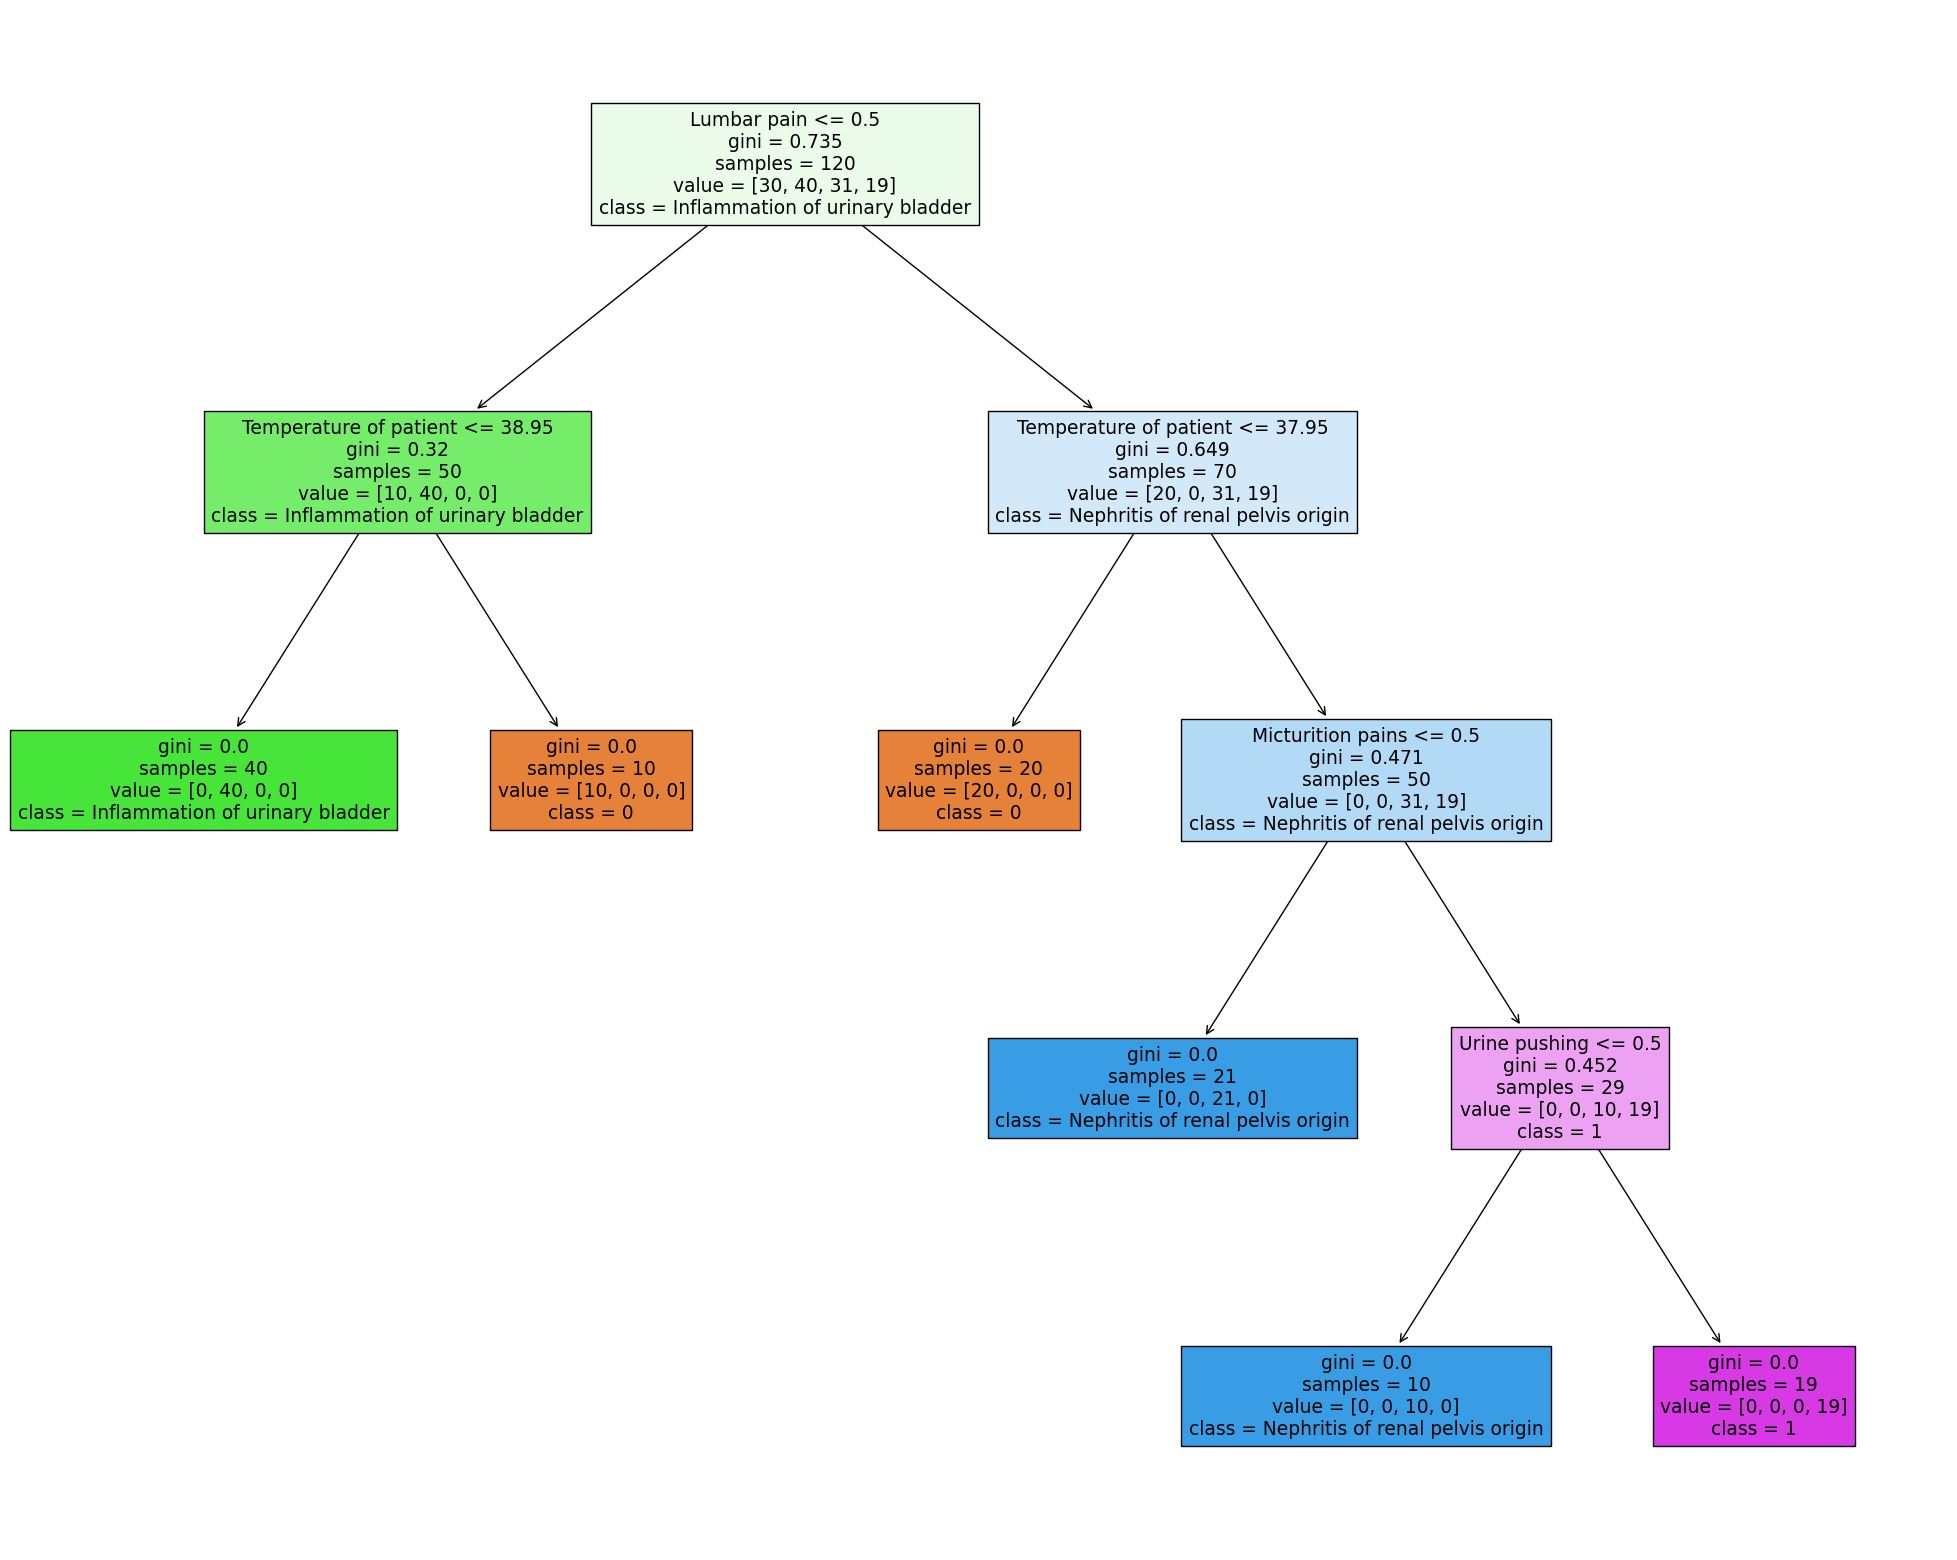

In [11]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(classifier1, 
                   feature_names=['Temperature of patient','Occurence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'],  
                   class_names=['0','Inflammation of urinary bladder','Nephritis of renal pelvis origin','1'],
                   filled=True)

### (c) Convert the decision rules

In [12]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [13]:
tree_to_code(classifier1,['Temperature of patient','Occurence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'])

def predict(Temperature_of_pa, Occurence_of_n, Lumbar, Urine_pu, Micturition_, Burning_of_urethra,_itch,_swelling_of_urethra_o):
    if Lumbar pain <= 0.5:
        if Temperature of patient <= 38.95:
            return [[ 0. 40.  0.  0.]]
        else:  # if Temperature of patient > 38.95
            return [[10.  0.  0.  0.]]
    else:  # if Lumbar pain > 0.5
        if Temperature of patient <= 37.95:
            return [[20.  0.  0.  0.]]
        else:  # if Temperature of patient > 37.95
            if Micturition pains <= 0.5:
                return [[ 0.  0. 21.  0.]]
            else:  # if Micturition pains > 0.5
                if Urine pushing <= 0.5:
                    return [[ 0.  0. 10.  0.]]
                else:  # if Urine pushing > 0.5
                    return [[ 0.  0.  0. 19.]]


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [14]:
parameters = {'ccp_alpha' : np.arange(10**-4,10**4)}
grid_search_dt = GridSearchCV(estimator = classifier1,
param_grid = parameters,
scoring = 'accuracy',
cv = 5,
verbose = 1)

In [15]:
grid_search_dt.fit(X_train, lbtr)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([1.0000000e-04, 1.0001000e+00, 2.0001000e+00, ..., 9.9970001e+03,
       9.9980001e+03, 9.9990001e+03])},
             scoring='accuracy', verbose=1)

In [16]:
classifier3=tree.DecisionTreeClassifier(ccp_alpha= 0.0001, criterion= 'gini',random_state=0)
classifier3.fit(X_train,lbtr)

DecisionTreeClassifier(ccp_alpha=0.0001, random_state=0)

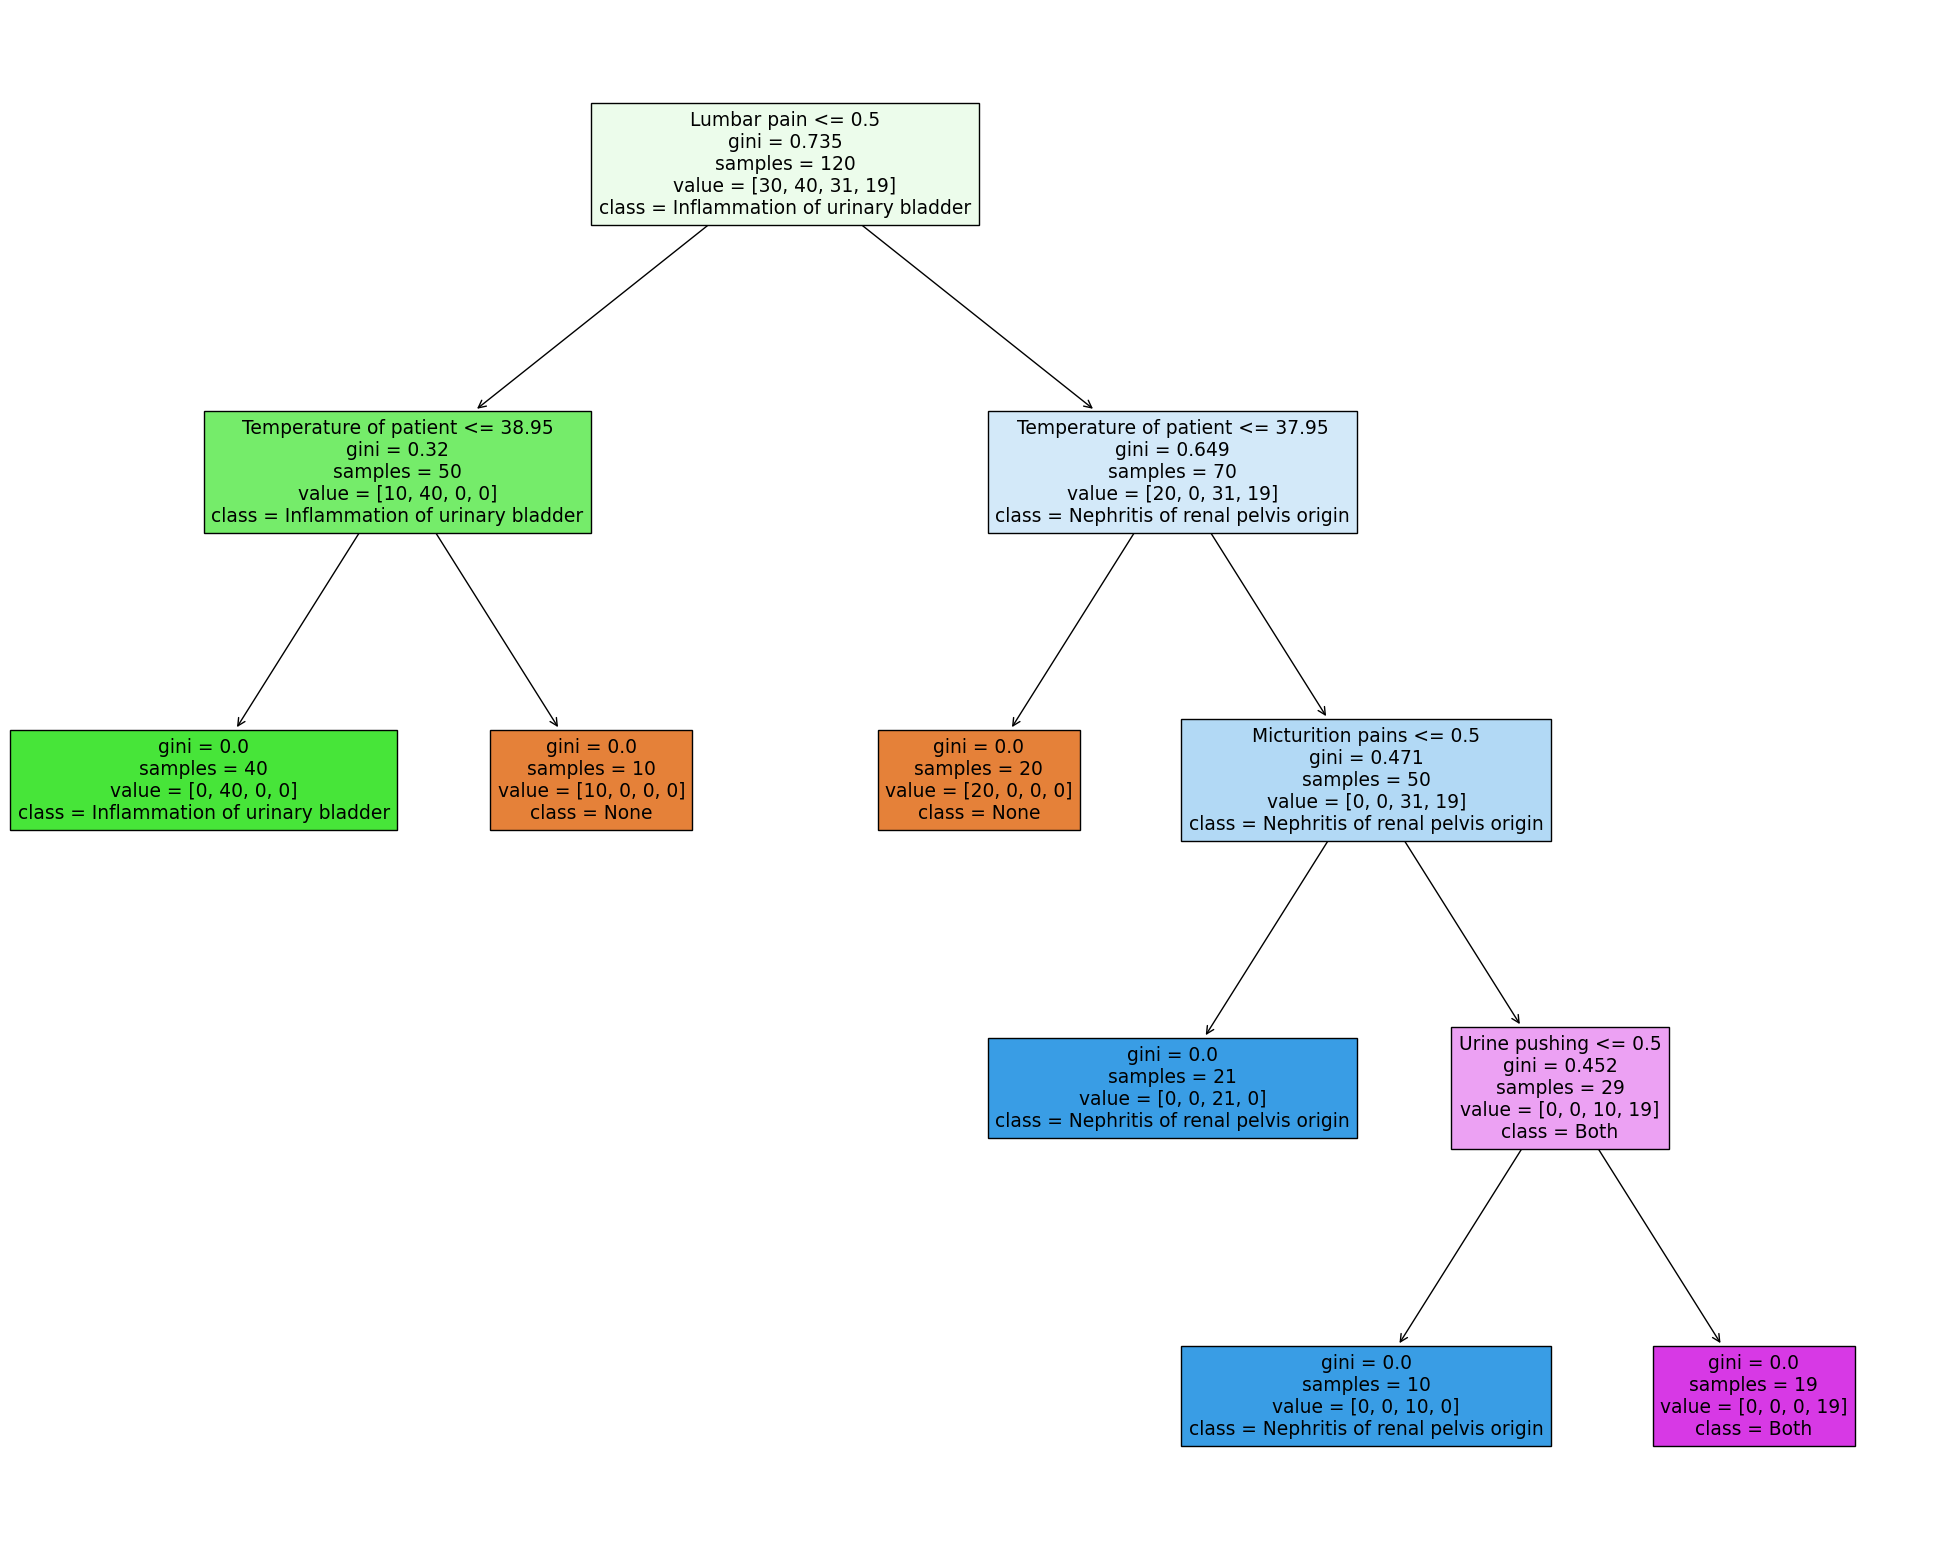

In [17]:
fig1 = plt.figure(figsize=(25,20))
_=tree.plot_tree(classifier3, 
                   feature_names=['Temperature of patient','Occurence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'],  
                   class_names=['None','Inflammation of urinary bladder','Nephritis of renal pelvis origin','Both'],
                   filled=True)

In [18]:
tree_to_code(classifier3,['Temperature of patient','Occurence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'])

def predict(Temperature_of_pa, Occurence_of_n, Lumbar, Urine_pu, Micturition_, Burning_of_urethra,_itch,_swelling_of_urethra_o):
    if Lumbar pain <= 0.5:
        if Temperature of patient <= 38.95:
            return [[ 0. 40.  0.  0.]]
        else:  # if Temperature of patient > 38.95
            return [[10.  0.  0.  0.]]
    else:  # if Lumbar pain > 0.5
        if Temperature of patient <= 37.95:
            return [[20.  0.  0.  0.]]
        else:  # if Temperature of patient > 37.95
            if Micturition pains <= 0.5:
                return [[ 0.  0. 21.  0.]]
            else:  # if Micturition pains > 0.5
                if Urine pushing <= 0.5:
                    return [[ 0.  0. 10.  0.]]
                else:  # if Urine pushing > 0.5
                    return [[ 0.  0.  0. 19.]]


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [19]:
data1=pd.read_csv("../data/communities.data",header=None,usecols=[i for i in range(5,128)])
# data1

In [20]:
x_train=pd.DataFrame(data1.iloc[:1495,:-1])
x_test=pd.DataFrame(data1.iloc[1495:,:-1])
y_train=pd.DataFrame(data1.iloc[:1495,-1])
y_test=pd.DataFrame(data1.iloc[1495:,-1])

### (b) Missing values

In [21]:
x_train_n=x_train.replace('?',np.nan)
x_train=x_train_n.values
x_test_n=x_test.replace('?',np.nan)
x_test=x_test_n.values
y_train_n=y_train.replace('?',np.nan)
y_train=y_train_n.values
y_test_n=y_test.replace('?',np.nan)
y_test=y_test_n.values

In [22]:
imputer1 = SimpleImputer(missing_values=np.nan,strategy='median')
imputer1.fit(x_train)
x_train=imputer1.transform(x_train)
imputer2 = SimpleImputer(missing_values=np.nan,strategy='median')
imputer2.fit(x_test)
x_test=imputer2.transform(x_test)
imputer3 = SimpleImputer(missing_values=np.nan,strategy='median')
imputer3.fit(y_train)
y_train=imputer3.transform(y_train)
imputer4 = SimpleImputer(missing_values=np.nan,strategy='median')
imputer4.fit(y_test)
y_test=imputer4.transform(y_test)

### (c) Plot a correlation matrix

In [23]:
cvbb=['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop']

In [24]:
ty=pd.DataFrame(x_train)
ty.columns=cvbb
matrix = ty.corr()
matrix

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
population,1.000000,-0.040404,0.242144,-0.306023,0.168868,0.162282,0.014554,0.128721,0.075744,-0.107060,...,0.220907,0.747424,0.235510,0.283682,0.801862,0.739343,-0.181901,-0.021976,0.464459,0.126540
householdsize,-0.040404,1.000000,-0.068374,-0.243565,0.209848,0.473320,0.517742,0.371658,0.301949,-0.606714,...,0.014792,-0.020832,-0.003807,-0.030652,-0.050193,-0.024876,-0.003570,0.019385,-0.086315,-0.043984
racepctblack,0.242144,-0.068374,1.000000,-0.793431,-0.104912,-0.069449,0.118272,0.143406,0.125330,0.056381,...,-0.024091,0.155017,0.101270,0.169002,0.230959,0.179240,-0.166135,-0.006739,0.257781,0.104173
racePctWhite,-0.306023,-0.243565,-0.793431,1.000000,-0.270829,-0.436737,-0.189135,-0.258390,-0.175195,0.138619,...,-0.064869,-0.147054,-0.339787,-0.234460,-0.228060,-0.206644,0.135225,-0.017585,-0.272366,-0.096304
racePctAsian,0.168868,0.209848,-0.104912,-0.270829,1.000000,0.264600,-0.017945,0.106958,0.056442,-0.283709,...,0.170924,0.004790,0.360708,0.274826,0.021700,0.078086,0.006413,0.037729,0.100653,0.024122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PolicOperBudg,0.739343,-0.024876,0.179240,-0.206644,0.078086,0.109830,-0.012312,0.049107,0.022532,-0.039221,...,0.147401,0.530870,0.213265,0.254374,0.851986,1.000000,-0.125997,-0.044500,0.200431,0.345097
LemasPctPolicOnPatr,-0.181901,-0.003570,-0.166135,0.135225,0.006413,-0.010896,-0.022521,-0.031287,-0.020223,0.027182,...,-0.016891,-0.149918,0.011605,-0.028532,-0.182366,-0.125997,1.000000,-0.010891,-0.151631,-0.226436
LemasGangUnitDeploy,-0.021976,0.019385,-0.006739,-0.017585,0.037729,0.033023,0.036555,0.004359,0.008157,-0.030766,...,0.103225,0.026818,-0.099818,-0.113829,-0.030756,-0.044500,-0.010891,1.000000,-0.113303,-0.064391
LemasPctOfficDrugUn,0.464459,-0.086315,0.257781,-0.272366,0.100653,0.126210,0.012529,0.117998,0.083582,-0.022575,...,0.135150,0.322885,0.236545,0.209710,0.272857,0.200431,-0.151631,-0.113303,1.000000,0.226743


### (d) Calculate the Coefficient of Variation CV

In [25]:
li1={}
hj=list(ty.std()/ty.mean())    
# hj
for i in range(122):
    li1[ty.columns[i]]=hj[i]
print("CV for each feature is - ")
print(li1) 

CV for each feature is - 
{'population': 2.2411046245803745, 'householdsize': 0.3557995664028941, 'racepctblack': 1.4288854186502822, 'racePctWhite': 0.3302126634442826, 'racePctAsian': 1.359099684159002, 'racePctHisp': 1.612091005228411, 'agePct12t21': 0.3690831192095117, 'agePct12t29': 0.2913148106352062, 'agePct16t24': 0.5003099115377213, 'agePct65up': 0.4127759758512281, 'numbUrban': 2.0384614919156445, 'pctUrban': 0.6433181716461008, 'medIncome': 0.5919781653450651, 'pctWWage': 0.3286140569015946, 'pctWFarmSelf': 0.701897873082006, 'pctWInvInc': 0.365334582744191, 'pctWSocSec': 0.36071544651696696, 'pctWPubAsst': 0.7062058943769388, 'pctWRetire': 0.3454209567630026, 'medFamInc': 0.5406701530549352, 'perCapInc': 0.5580794526579645, 'whitePerCap': 0.519828467024789, 'blackPerCap': 0.5993405451897994, 'indianPerCap': 0.8183681264327733, 'AsianPerCap': 0.6148655265869314, 'OtherPerCap': 0.6732787934982031, 'HispPerCap': 0.4840679504501606, 'NumUnderPov': 2.3424431162181505, 'PctPopUnd

### (e) Scatter plots and box plots for highest CV features

In [26]:
hcv=dict(sorted(li1.items(), key=lambda item: item[1],reverse=True))
print(hcv)

{'PctPolicAsian': 5.527058737361458, 'NumStreet': 4.292922989491593, 'NumInShelters': 3.470952139705214, 'NumIlleg': 3.0589643472092356, 'NumImmig': 2.9266352462888148, 'LemasPctOfficDrugUn': 2.552945511727576, 'NumUnderPov': 2.3424431162181505, 'LemasSwornFT': 2.2480415687753528, 'population': 2.2411046245803745, 'numbUrban': 2.0384614919156445, 'HousVacant': 1.9684670491351257, 'PolicOperBudg': 1.6455076490864686, 'LandArea': 1.6454078602149063, 'racePctHisp': 1.612091005228411, 'PctNotSpeakEnglWell': 1.4566183675039828, 'LemasTotalReq': 1.451886697905019, 'racepctblack': 1.4288854186502822, 'PctUsePubTrans': 1.3971097612127603, 'racePctAsian': 1.359099684159002, 'PctPolicHisp': 1.3538815603064067, 'PctRecentImmig': 1.288286991787815, 'PctRecImmig5': 1.286184069121448, 'PctRecImmig10': 1.2704761039803925, 'PctRecImmig8': 1.2655788622333226, 'OfficAssgnDrugUnits': 1.1745654937502579, 'PctPersDenseHous': 1.1329256518367359, 'PolicCars': 1.11283148435929, 'PctForeignBorn': 1.06587973413

In [27]:
li2=[]
li_k=list(hcv.keys())
for i in range(11):
    li2.append(li_k[i])
print(li2)

['PctPolicAsian', 'NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'LemasSwornFT', 'population', 'numbUrban', 'HousVacant']


In [28]:
yh1=pd.DataFrame(ty['PctPolicAsian'])
yh2=pd.DataFrame(ty['NumStreet'])
yh3=pd.DataFrame(ty['NumInShelters'])
yh4=pd.DataFrame(ty['NumIlleg'])
yh5=pd.DataFrame(ty['NumImmig'])
yh6=pd.DataFrame(ty['LemasPctOfficDrugUn'])
yh7=pd.DataFrame(ty['NumUnderPov'])
yh8=pd.DataFrame(ty['LemasSwornFT'])
yh9=pd.DataFrame(ty['population'])
yh10=pd.DataFrame(ty['numbUrban'])
yh11=pd.DataFrame(ty['HousVacant'])
df=pd.concat([yh1,yh2,yh3,yh4,yh5,yh6,yh7,yh8,yh9,yh10,yh11],axis=1)
df

,PctPolicAsian,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,LemasSwornFT,population,numbUrban,HousVacant
0,0.10,0.00,0.04,0.04,0.03,0.32,0.08,0.03,0.19,0.20,0.21
1,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.02
2,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.01
3,0.00,0.00,0.00,0.03,0.02,0.00,0.01,0.02,0.04,0.06,0.01
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.02,0.01
1491,0.12,0.03,0.09,0.04,0.15,0.61,0.08,0.02,0.16,0.18,0.06
1492,0.00,0.00,0.00,0.03,0.00,0.00,0.04,0.02,0.01,0.00,0.05
1493,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.02,0.06,0.07,0.02


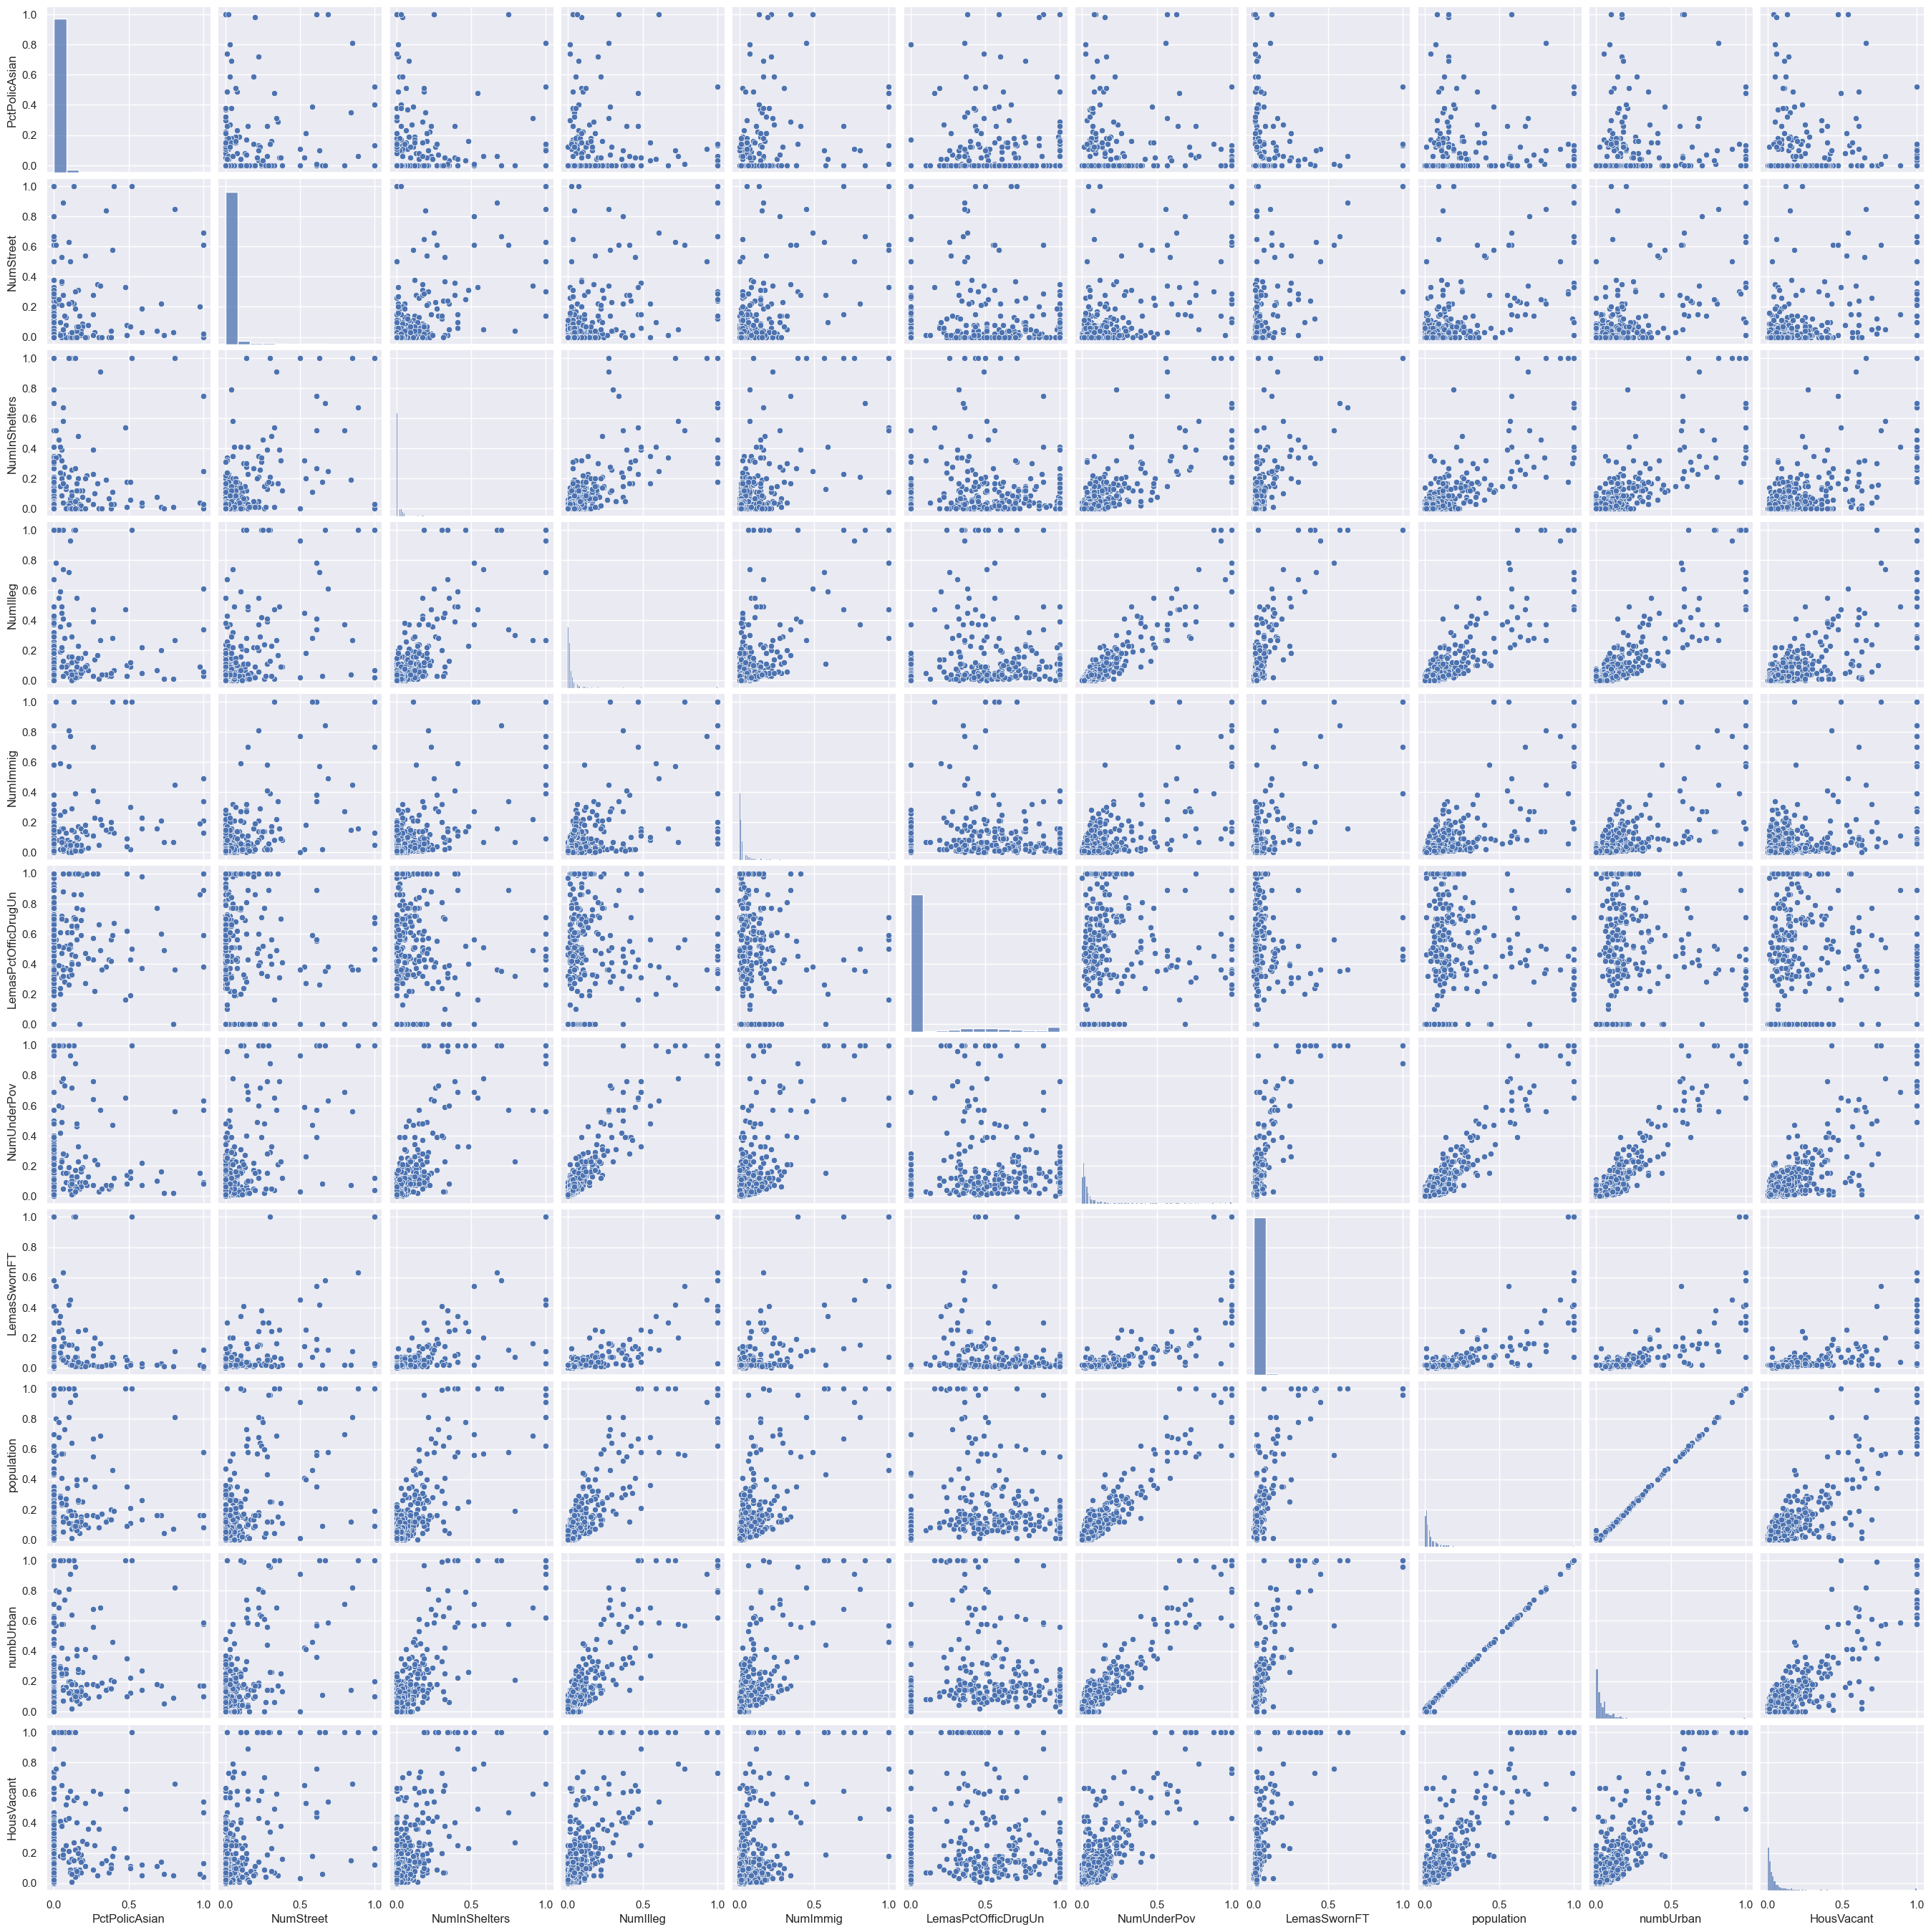

In [29]:
sns.set(rc={'figure.figsize':(18,12)})
sns.pairplot(data=df,vars=['PctPolicAsian', 'NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'LemasSwornFT', 'population', 'numbUrban', 'HousVacant'],palette="rocket")

##### As we can see from the scatter plot above, there is high correlation between population and numbUrban as they form a nearly straight line in the plot. In the similar way all other features can be seen showing low positive correlation.

<AxesSubplot:>

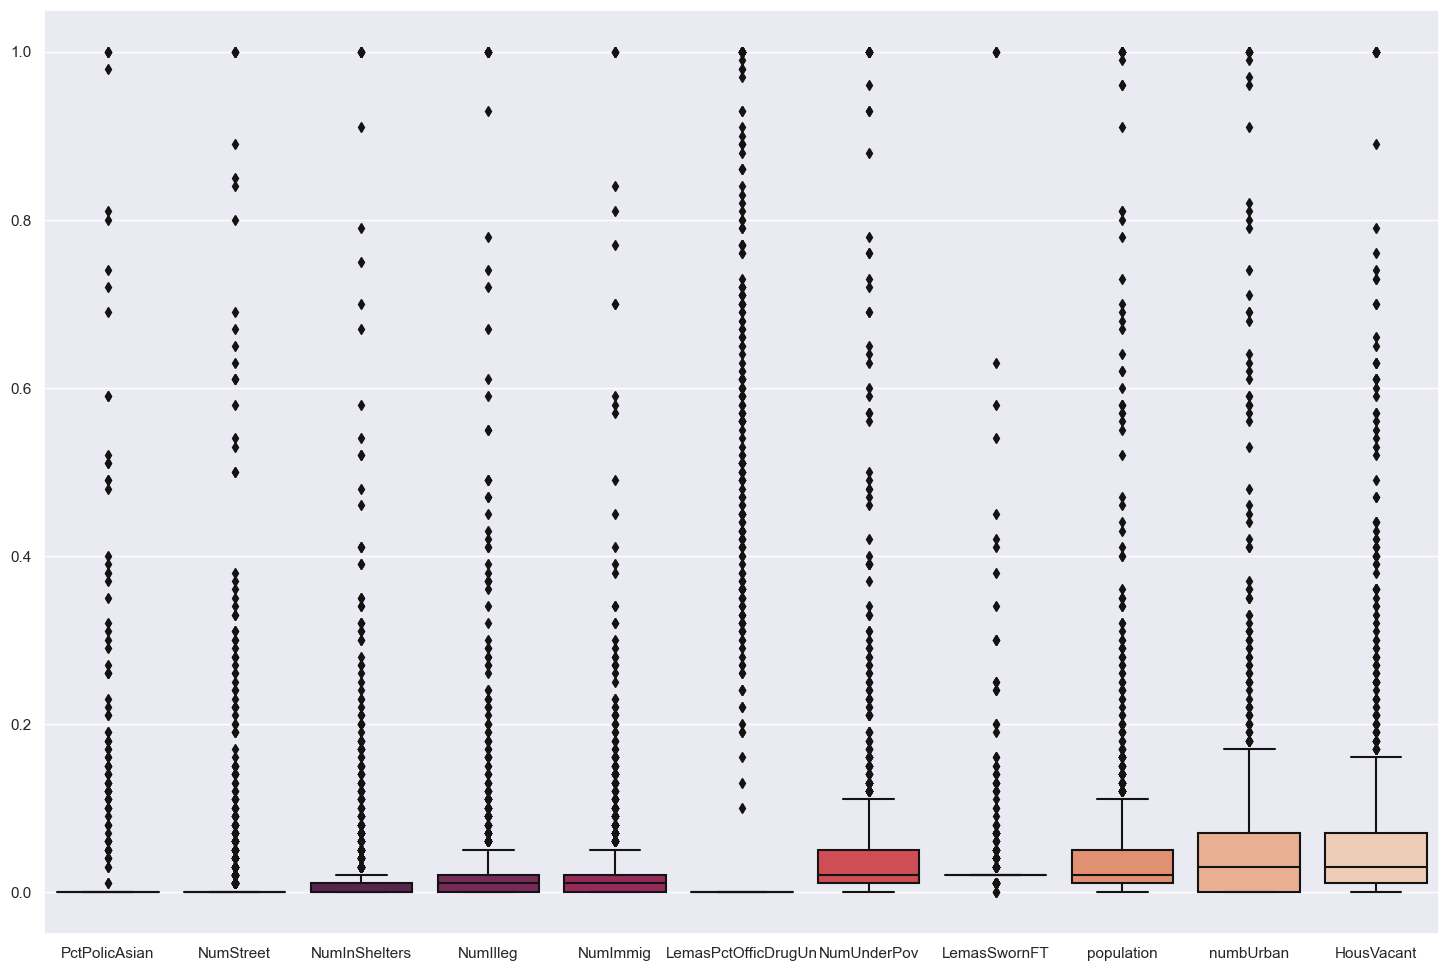

In [30]:
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(data=df,  palette="rocket")

### (f) Fit a linear model

In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
err=mean_squared_error(y_test,y_pred)
print("Test error for linear model using least squares - ",err)

Test error for linear model using least squares -  1.766504375344183e+17


### (g) Fit a ridge regression model

In [32]:
grid={}
grid['alpha']=np.arange(10**-4,10**4)
model=Ridge()
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
results = search.fit(x_train, y_train)
print('NMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

NMSE: -0.019
Config: {'alpha': 2.0001}


In [33]:
model1=Ridge(alpha=2.0001)
model1.fit(x_train,y_train)
y_pd=model1.predict(x_test)
err2=mean_squared_error(y_test,y_pd)
print("test error for ridge regression - ",err2)

test error for ridge regression -  0.0175187089390846


### (h) Fit a LASSO model

In [34]:
modell = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(10**-4,10**4)
search = GridSearchCV(modell, grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
results = search.fit(x_train, y_train)

print('NMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

NMSE: -0.019
Config: {'alpha': 0.0001}


In [35]:
model2=Lasso(alpha=0.0001)
model2.fit(x_train,y_train)
y_pd1=model2.predict(x_test)
err3=mean_squared_error(y_test,y_pd1)
print("test error for lasso regression - ",err3)

test error for lasso regression -  0.01762891854882197


In [36]:
names=ty.columns
print("features selected by lasso model - ")
print([names[i] for i in range(len(names)) if model2.coef_[i] != 0])

features selected by lasso model - 
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSame

In [37]:
mm=MinMaxScaler()
x_train_s=mm.fit_transform(x_train)
x_test_s=mm.fit_transform(x_test)

In [38]:
model3 = Lasso()
grid = dict()
grid['alpha'] = np.arange(10**-4,10**4)
# define search
search = GridSearchCV(model3, grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
# perform the search
results = search.fit(x_train_s, y_train)

# summarize
print('NMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

NMSE: -0.019
Config: {'alpha': 0.0001}


In [39]:
model4=Lasso(alpha=0.0001)
model4.fit(x_train_s,y_train)
y_pd4=model4.predict(x_test_s)
err4=mean_squared_error(y_test,y_pd4)
print("test error for lasso regression with standardized features - ",err4)

test error for lasso regression with standardized features -  0.017709986952239867


In [40]:
names1=ty.columns
print("features selected by lasso model with standardized features - ")
print([names1[i] for i in range(len(names1)) if model4.coef_[i] != 0])

features selected by lasso model with standardized features - 
['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet',

### (i) Fit a PCR model

In [41]:
pca = PCA() 
X_train_pc = pca.fit_transform(x_train)
lin_reg = LinearRegression()

rmse_list = []

for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i],
                                      y_train, 
                                      cv=5, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
print("Number of principal components - ",rmse_list.index(min(rmse_list))+1)  

Number of principal components -  96


In [42]:
best_pc_num = 96

lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

X_test_pc = pca.transform(x_test)[:,:best_pc_num]

preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
print("Test error for the pcr model - ",pcr_score_test)

Test error for the pcr model -  0.13547286082508814


### (j) Fit a boosting tree

In [43]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
parameters = {
    'n_estimators': [50,100,200],
    'reg_alpha': np.arange(10**-1,10**1)
}
grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=parameters,
    cv = 5,
)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'n_estimators': 50, 'reg_alpha': 5.1}


In [44]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
model5=xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=50, reg_alpha= 4.1)
model5.fit(x_train_s,y_train)
y_pred5=model5.predict(x_test_s)
err5=mean_squared_error(y_test,y_pred5)
print("Test error for L-1 penalized gradient boosting tree -", err5)

Test error for L-1 penalized gradient boosting tree - 0.018610391032886007
